### Linear Regression
- 독립변수: feature, 종속변수 : target
- 독립변수 개수의 따라서 : 단일회귀, 다중회귀


In [126]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 

# seaboarn lib add
import seaborn as sns

import time

%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
    print('d')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('w')
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# ml lib
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer, load_digits

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold , cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier
from   sklearn.ensemble        import RandomForestClassifier , VotingClassifier, AdaBoostClassifier
from   sklearn.linear_model    import LinearRegression, LogisticRegression
from   sklearn.svm             import SVC
from   sklearn.neighbors       import KNeighborsClassifier
from   xgboost                 import XGBClassifier

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix ,make_scorer , precision_recall_curve , roc_curve,roc_auc_score,mean_squared_error

from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler ,Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

import missingno as msno 

import graphviz

from IPython.display import Image


print('sklearn version - ' , sklearn.__version__)

numpy version  -  1.20.3
pandas version -  1.3.2
d
sklearn version -  0.24.2


In [4]:
df = pd.DataFrame({
'height': [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83],
'mass': [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46],
})
df.head()

,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  15 non-null     float64
 1   mass    15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [7]:
# 독립변수 또는 설명변수
X = df[['height']]

In [8]:
# 종속변수 또는 반응변수
Y = df[['mass']]

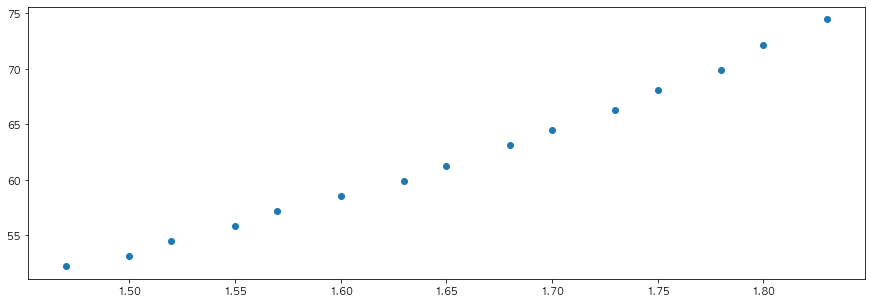

In [9]:
plt.figure(figsize=(15,5))
plt.plot(X,Y,'o')
plt.show()
plt.close()

In [12]:
linear_model = LinearRegression()
linear_model.fit(X,Y)

LinearRegression()

In [14]:
linear_model.predict([[1.79]]) # 다중회귀 때문에 이렇게 2차원 형태로 값을 넘겨주는거 같다

array([[70.61525799]])

In [15]:
# 기울기
linear_model.coef_

array([[61.27218654]])

In [16]:
# 절편
linear_model.intercept_

array([-39.06195592])

In [17]:
# R squared
linear_model.score(X,Y)

0.9891969224457968

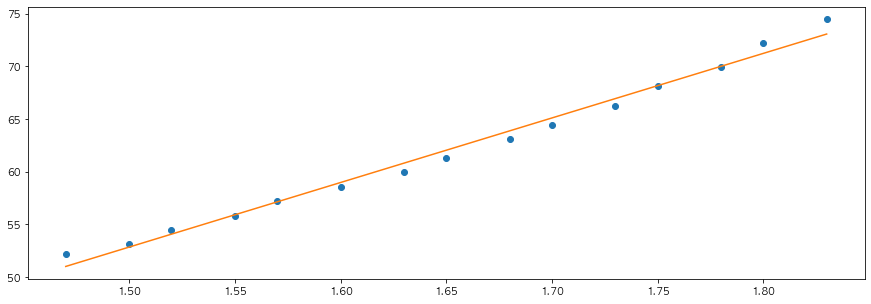

In [19]:
plt.figure(figsize=(15,5))
plt.plot(X,Y,'o')
plt.plot(X,linear_model.predict(X))
plt.show()
plt.close()

#### auto-mpg.csv 실습

In [24]:
mpg_df = pd.read_csv('./Data/auto-mpg.csv',header=None)
mpg_df.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight' , 'acc' , 'model year' , 'origin' , 'name']
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acc,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [26]:
# mpg를 예측할거다
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acc           398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [29]:
mpg_df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [31]:
mpg_df['horsepower']=mpg_df['horsepower'].replace('?',np.nan)
mpg_df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [32]:
mpg_df.dropna(subset=['horsepower'],axis=0,inplace=True)
mpg_df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [33]:
mpg_df['horsepower'] = mpg_df['horsepower'].astype(float)
mpg_df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

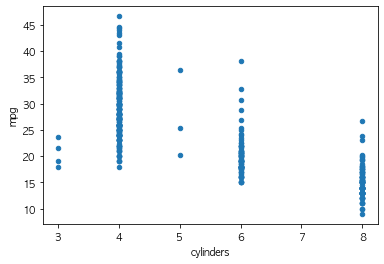

In [39]:
# 애초에 cylinder는 범주형이다
mpg_df.plot(kind='scatter',x='cylinders',y='mpg')

<AxesSubplot:>

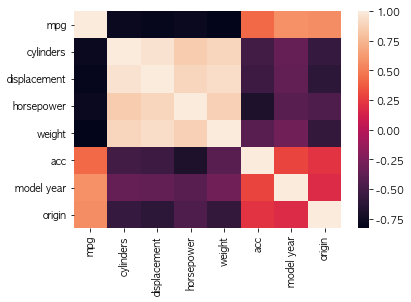

In [35]:
sns.heatmap(mpg_df.corr())

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

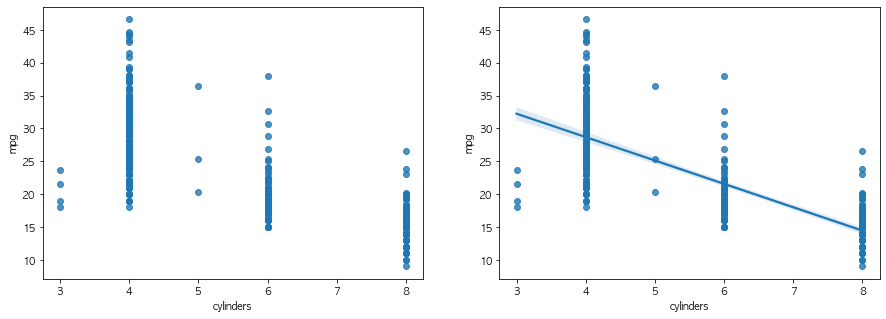

In [46]:
fig = plt.figure(figsize=(15,5))
area01 = fig.add_subplot(1,2,1)
area02 = fig.add_subplot(1,2,2)
sns.regplot(data=mpg_df,x='cylinders',y='mpg',ax=area01,fit_reg=False)
sns.regplot(data=mpg_df,x='cylinders',y='mpg',ax=area02)

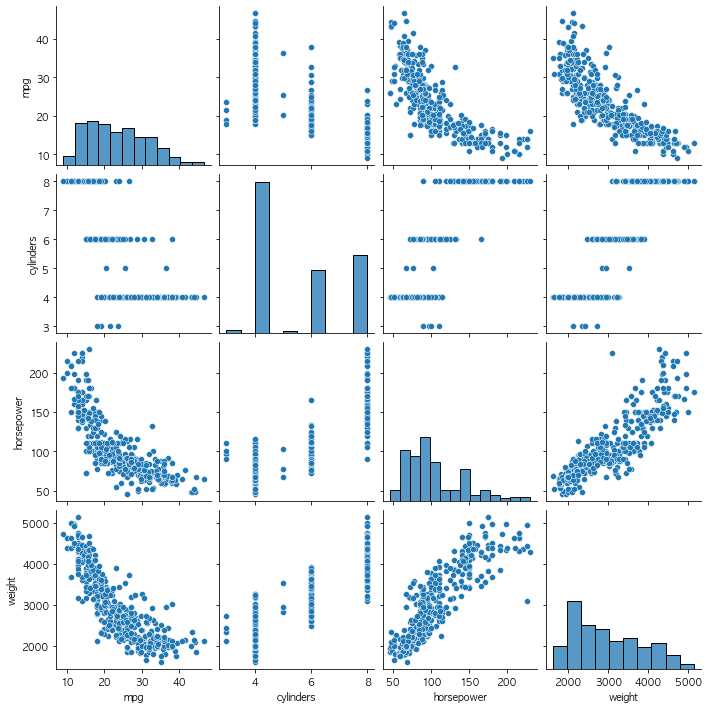

In [49]:
sns.pairplot(mpg_df[['mpg','cylinders','horsepower','weight']])

In [62]:
# 독립변수 종속변수 분리
X = mpg_df[['cylinders','horsepower','weight']]
Y = mpg_df[['mpg']]

In [63]:
X_train , X_test , y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=111)
X_train.shape , X_test.shape , y_train.shape, y_test.shape

((313, 3), (79, 3), (313, 1), (79, 1))

In [64]:
mpg_model = LinearRegression()
mpg_model.fit(X_train,y_train)

LinearRegression()

In [65]:
r_squared = mpg_model.score(X_test,y_test)
r_squared

0.7138561071545959

In [66]:
# 전체 X값에 대한 예측 
mpg_model.predict(X)

array([[18.88732413],
       [15.82258268],
       [18.0692619 ],
       [18.08516903],
       [18.58964296],
       [10.44191195],
       [ 9.07649468],
       [ 9.59385056],
       [ 8.40536982],
       [13.51682933],
       [16.21723588],
       [16.56263846],
       [16.34598892],
       [15.50525449],
       [27.55974978],
       [24.81158265],
       [25.00656058],
       [26.70527971],
       [29.25544374],
       [33.29475568],
       [26.44048585],
       [27.54686783],
       [27.54384265],
       [27.23071644],
       [26.08717864],
       [ 7.98722991],
       [10.13846631],
       [ 9.51734006],
       [ 8.66333799],
       [29.25544374],
       [28.42706264],
       [28.32329227],
       [25.57209996],
       [21.00902936],
       [21.88694698],
       [22.73728557],
       [22.10434449],
       [13.08655543],
       [11.14513696],
       [14.08536062],
       [14.56969216],
       [ 8.24701318],
       [ 9.94452224],
       [ 7.56072917],
       [23.24360787],
       [28

### iris 데이터 이용해서 회귀?

In [108]:
iris = load_iris()

In [109]:
X = pd.DataFrame(iris.data,columns=iris.feature_names)
Y = pd.DataFrame(iris.target,columns=['species'])

In [110]:
iris_df = pd.concat([X,Y],axis=1)
iris_df['species'] = Y['species'].replace([0,1,2],['setosa','versicolor','virginica'])
# 굳이 species저렇게 하는 이유는 아래 그래프 그리기 위해서이다
# 0 1 2로 되어있으면 alpha처럼 그래프 그려질거다

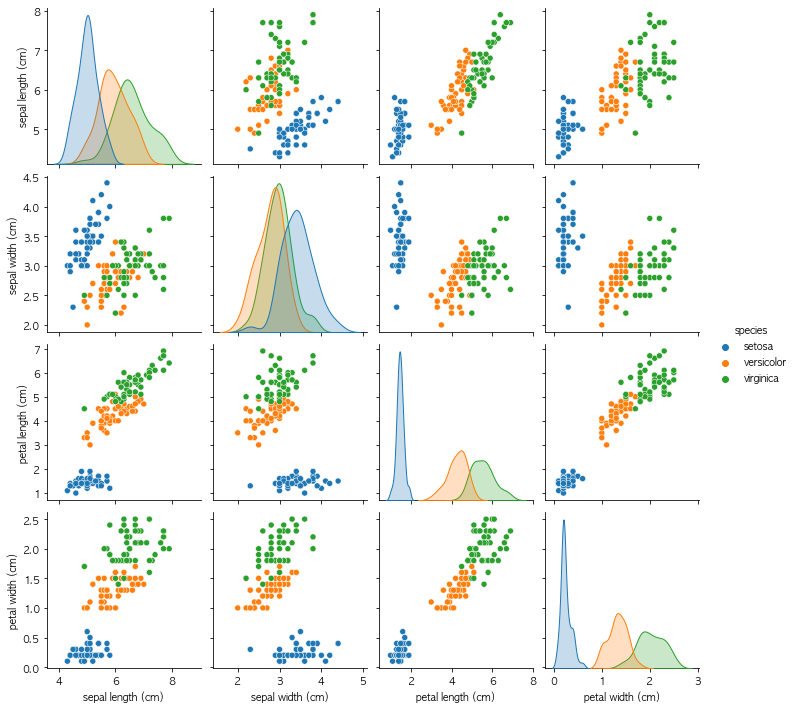

In [111]:
sns.pairplot(iris_df,hue='species')

In [112]:
iris_model = LinearRegression()

In [113]:
X_train , X_test , y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=200)
X_train.shape , X_test.shape , y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [114]:
iris_model.fit(X_train,y_train)

LinearRegression()

In [115]:
iris_model.score(X_test,y_test)

0.9511639543091398

In [128]:
y_predict = iris_model.predict(X_test)

mean_squared_error(y_test,y_predict)

0.03234031470194746